In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data_t = np.load('/om/user/huidili/wmUpdate/150b50s_decode/spk_dec_input/061311Tir_spk_rate.npz')
tps = np.mean(data_t['rate_bins'], axis=1)

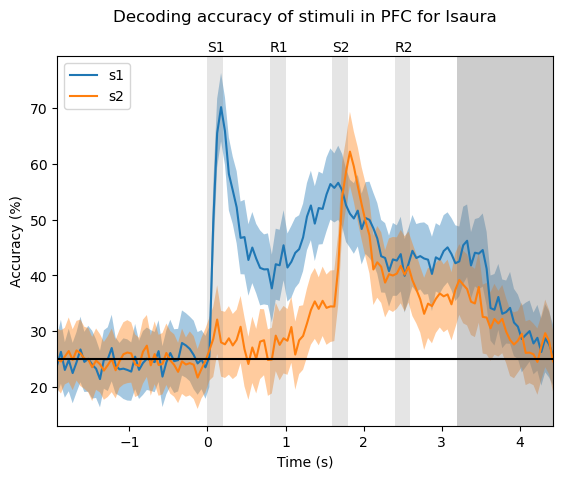

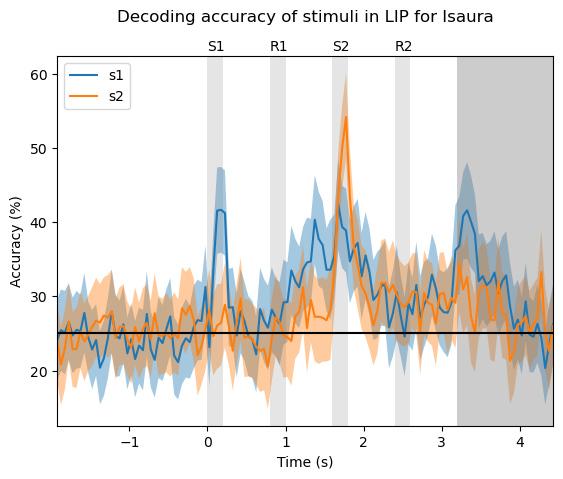

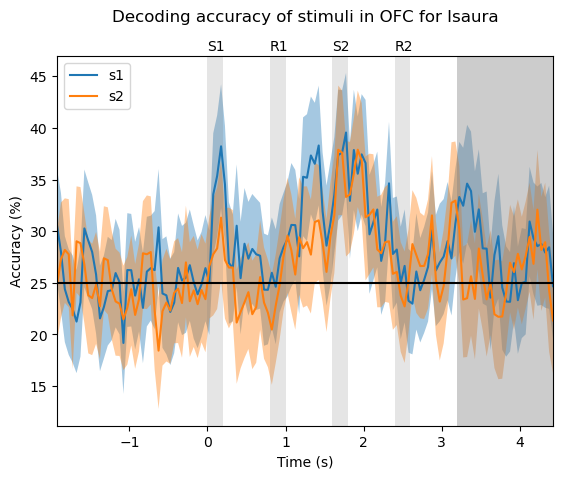

In [8]:
areas = ['PFC', 'LIP', 'OFC']
# conditions = ['retain', 'update']


for area in areas:
    acc1 = np.load(f'/om/user/huidili/wmUpdate/150b50s_decode/spk_dec_result/ISA/all_trials/50cv/ISA_s1_{area}_LDA_accuracy.npz')['accuracy']*100
    acc2 = np.load(f'/om/user/huidili/wmUpdate/150b50s_decode/spk_dec_result/ISA/all_trials/50cv/ISA_s2_{area}_LDA_accuracy.npz')['accuracy']*100

    mean1 = np.mean(acc1, axis=(1,2))
    mean2 = np.mean(acc2, axis=(1,2))
    sd1 = np.std(acc1, axis=(1,2))
    sd2 = np.std(acc2, axis=(1,2))
    fig, ax = plt.subplots(figsize=(6.4,4.8))

    ax.plot(tps, mean1, label='s1')
    ax.plot(tps, mean2, label='s2')
    ax.fill_between(tps, mean1-sd1, mean1+sd1, alpha=0.4)
    ax.fill_between(tps, mean2-sd1, mean2+sd2, alpha=0.4)

    ax.set_xlim(tps[0], tps[-1])
    ax_b, ax_t = ax.get_ylim()
    ax_l, ax_r = ax.get_xlim()
    ax.axvline(x=3.2, ymin=ax_b, ymax=ax_t, color='black')
    ax.axhline(y=25, xmin=ax_l, xmax=ax_r, color='black')
    # ax.set_ylim(ax_b, ax_t)
    ax_vlines = [0, 0.2, 0.8, 1, 1.6, 1.8, 2.4, 2.6]
    vline_text = ['S1', 'R1', 'S2', 'R2']
    for j in range(0, 8, 2):
        ax.axvspan(ax_vlines[j], ax_vlines[j + 1], alpha=0.2, color='gray', linewidth=0)
    ax.axvspan(3.2, ax_r, alpha=0.4, color='gray', linewidth=0)
    for j in range(len(vline_text)):
        plt.text(ax_vlines[j * 2], ax_t * 1.02, vline_text[j], verticalalignment='center')


    ax.set_title(f'Decoding accuracy of stimuli in {area} for Isaura', pad=25)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Accuracy (%)')
    plt.legend()
    fig.savefig(f'/om/user/huidili/wmUpdate/150b50s_decode/plots/dec_acc/ISA/stimuli_acc_{area}_ISA.png')




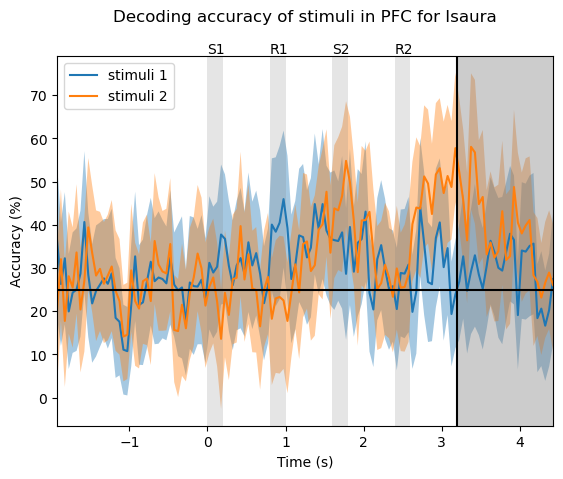

In [11]:
# areas = ['PFC', 'LIP', 'OFC']
# conditions = ['retain', 'update']
areas = ['PFC']
conditions = ['update']
item = 'stimuli'

for area in areas:
    for condition in conditions:
        acc1 = np.load(f'/om/user/huidili/wmUpdate/150b50s_decode/spk_dec_result/ISA/conditions/50cv/ISA_s1_{area}_{condition}_LDA_accuracy.npz')['accuracy']*100
        acc2 = np.load(f'/om/user/huidili/wmUpdate/150b50s_decode/spk_dec_result/ISA/conditions/50cv/ISA_s2_{area}_{condition}_LDA_accuracy.npz')['accuracy']*100

        mean1 = np.mean(acc1, axis=(1,2))
        mean2 = np.mean(acc2, axis=(1,2))
        sd1 = np.std(acc1, axis=(1,2))
        sd2 = np.std(acc2, axis=(1,2))
        fig, ax = plt.subplots(figsize=(6.4,4.8))

        ax.plot(tps, mean1, label='stimuli 1')
        ax.plot(tps, mean2, label='stimuli 2')
        ax.fill_between(tps, mean1-sd1, mean1+sd1, alpha=0.4)
        ax.fill_between(tps, mean2-sd1, mean2+sd2, alpha=0.4)

        ax.set_xlim(tps[0], tps[-1])
        ax_b, ax_t = ax.get_ylim()
        ax_l, ax_r = ax.get_xlim()
        ax.axvline(x=3.2, ymin=ax_b, ymax=ax_t, color='black')
        ax.axhline(y=25, xmin=ax_l, xmax=ax_r, color='black')
        # ax.set_ylim(ax_b, ax_t)
        ax_vlines = [0, 0.2, 0.8, 1, 1.6, 1.8, 2.4, 2.6]
        vline_text = ['S1', 'R1', 'S2', 'R2']
        for j in range(0, 8, 2):
            ax.axvspan(ax_vlines[j], ax_vlines[j + 1], alpha=0.2, color='gray', linewidth=0)
        ax.axvspan(3.2, ax_r, alpha=0.4, color='gray', linewidth=0)
        for j in range(len(vline_text)):
            plt.text(ax_vlines[j * 2], ax_t * 1.02, vline_text[j], verticalalignment='center')


        ax.set_title(f'Decoding accuracy of {item} in {area} for Isaura', pad=25)
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Accuracy (%)')
        plt.legend()
    #     fig.savefig(f'/om/user/huidili/wmUpdate/150b50s_decode/plots/{item}_bcond_acc/{item}_acc_{area}_Tir.png')


